In [4]:
import numpy as np
from astropy.table import Table, vstack
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
cosmo_values = pd.read_csv('/pbs/home/n/namourou/workspace/side_codes/clusters/amico/verifications/verif_members/model_SUB_i_greta_t5_param.txt', sep="  ")
cosmo_values = Table.from_pandas(cosmo_values)

/tmp/ipykernel_190/2900634211.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  cosmo_values = pd.read_csv('/pbs/home/n/namourou/workspace/side_codes/clusters/amico/verifications/verif_members/model_SUB_i_greta_t5_param.txt', sep="  ")


In [6]:
mb_inpath = '/sps/lsst/groups/clusters/amico_validation_project/catalogs/AMICO/raw_amico_cats/test_cosmoDC2_compute_lambstar/9559_map_associations_w_mag.fits'
raw_mb_inpath = '/sps/lsst/groups/clusters/amico_validation_project/catalogs/AMICO/raw_amico_cats/test_cosmoDC2_compute_lambstar/9559_map_associations_noBuffer.fits'
neighbours_path = '/sps/lsst/groups/clusters/amico_validation_project/catalogs/CosmoDC2/cosmodc2_neighbours.fits'
healpath = '/sps/lsst/users/tguillem/web/clusters/catalogs/cosmoDC2_photoz_flexzboost/v1/'
inpath = '/sps/lsst/groups/clusters/amico_validation_project/catalogs/AMICO/raw_amico_cats/test_cosmoDC2_compute_lambstar/9559_map_detections_refined_noBuffer.txt'
# = '/sps/lsst/groups/clusters/amico_validation_project/catalogs/AMICO/amico_cats/small/amico_map_associations/all_maps.fits'

In [7]:
cl_cat = pd.read_csv(inpath, sep="\t", header = 243)
cl_cat = Table.from_pandas(cl_cat)
mb = Table.read(mb_inpath)

## Cluster with discrepancy

In [8]:
#Members at the center of the tile (border ones might have masks effects)
display(cl_cat[(cl_cat['Xphys']>=64.5) & (cl_cat['Xphys']<=64.7) & (cl_cat['Yphys']<=-34) & (cl_cat['Yphys']>=-34.5)])

# ID,Xpix,Ypix,Zpix,Xphys,Yphys,Zphys,SN,SN_NO_CLUSTER,AMP,RICH,LIKE,MSKFRC,POISS,LAMB,LAMBSTAR,ZPIX_SIGM,ZPIX_SIGP,ZPHYS_SIGM,ZPHYS_SIGP,ODDS,Pz-0,Pz-1,Pz-2,Pz-3,Pz-4,Pz-5,Pz-6,Pz-7,Pz-8,Pz-9,Pz-10,Pz-11,Pz-12,Pz-13,Pz-14,Pz-15,Pz-16,Pz-17,Pz-18,Pz-19,Pz-20,Pz-21,Pz-22,Pz-23,Pz-24,Pz-25,Pz-26,Pz-27,Pz-28,Pz-29,Pz-30,Pz-31,Pz-32,Pz-33,Pz-34,Pz-35,Pz-36,Pz-37,Pz-38,Pz-39,Pz-40,Pz-41,Pz-42,Pz-43,Pz-44,Pz-45,Pz-46,Pz-47,Pz-48,Pz-49,Pz-50,Pz-51,Pz-52,Pz-53,Pz-54,Pz-55,Pz-56,Pz-57,Pz-58,Pz-59,Pz-60,Pz-61,Pz-62,Pz-63,Pz-64,Pz-65,Pz-66,Pz-67,Pz-68,Pz-69,Pz-70,Pz-71,Pz-72,Pz-73,Pz-74,Pz-75,Pz-76,Pz-77,Pz-78,Pz-79,Pz-80,Pz-81,Pz-82,Pz-83,Pz-84,Pz-85,Pz-86,Pz-87,Pz-88,Pz-89,Pz-90,Pz-91,Pz-92,Pz-93,Pz-94,Pz-95,Pz-96,Pz-97,Pz-98,Pz-99,Pz-100,Pz-101,Pz-102,Pz-103,Pz-104,Pz-105,Pz-106,Pz-107,Pz-108,Pz-109,Pz-110,Pz-111,Pz-112,Pz-113,Pz-114,Pz-115,Pz-116,Pz-117,Pz-118,Pz-119,Pz-120,Pz-121,Pz-122,Pz-123,Pz-124,Pz-125,Pz-126,Pz-127,Pz-128,Pz-129,Pz-130,Pz-131,Pz-132,Pz-133,Pz-134,Pz-135,Pz-136,Pz-137,Pz-138,Pz-139,Pz-140,Pz-141,Pz-142,Pz-143,Pz-144,Pz-145,Pz-146,Pz-147,Pz-148,Pz-149,Pz-150,Pz-151,Pz-152,Pz-153,Pz-154,Pz-155,Pz-156,Pz-157,Pz-158,Pz-159,Pz-160,Pz-161,Pz-162,Pz-163,Pz-164,Pz-165,Pz-166,Pz-167,Pz-168,Pz-169,Pz-170,Pz-171,Pz-172,Pz-173,Pz-174,Pz-175,Pz-176,Pz-177,Pz-178,Pz-179,Pz-180,Pz-181,Pz-182,Pz-183,Pz-184,Pz-185,Pz-186,Pz-187,Pz-188,Pz-189,Pz-190,Pz-191,Pz-192,Pz-193,Pz-194,Pz-195,Pz-196,Pz-197,Pz-198,Pz-199,Pz-200,Pz-201,Pz-202,Pz-203,Pz-204,Pz-205,Pz-206,Pz-207,Pz-208,Pz-209,Pz-210,Pz-211,Pz-212,Pz-213,Pz-214,Pz-215,Pz-216,Pz-217,Pz-218,Unnamed: 240
int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
119,245,318,127,64.516024,-34.288823,1.29,4.1211441,21.567145,1.7825358,62.81427,465.14172,0.008341189,0.99997828,40.36597,22.282081,0.72981753,0.40873414,0.0072981753,0.0040873414,0.97570156,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [9]:
#Looking at clusters with a low mask effect (ex : 3820)
cl_low_msk = cl_cat[cl_cat['MSKFRC']<=0.004]
cl_low_msk_c = cl_low_msk[(cl_low_msk['Xphys']>=64.5) & (cl_low_msk['Xphys']<=64.7) & (cl_low_msk['Yphys']<=-34) & (cl_low_msk['Yphys']>=-34.5)]

In [10]:
cl = cl_cat[cl_cat['# ID']==3820]
mbs_of_this_cl = mb[mb['ASSOC_ID']==3820]
ra_cl, dec_cl, z_cl = cl['Xphys'], cl['Yphys'], cl['Zphys']
ra_mb, dec_mb, z_mb = mbs_of_this_cl['ra'], mbs_of_this_cl['dec'], mbs_of_this_cl['redshift']

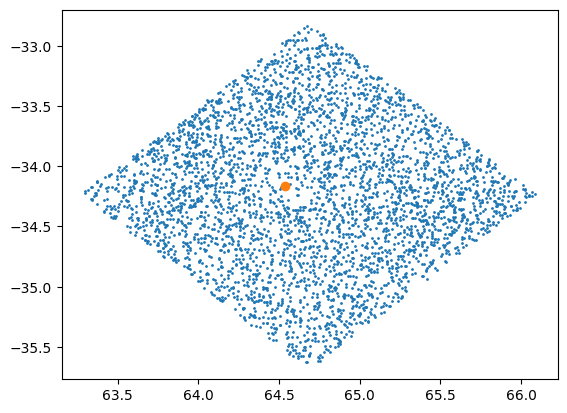

In [11]:
plt.scatter(cl_cat['Xphys'], cl_cat['Yphys'], s=1)
plt.scatter(ra_cl, dec_cl)
#plt.scatter(cl_cat[cl_cat['# ID']==1966]['Xphys'], cl_cat[cl_cat['# ID']==1966]['Yphys'])
# 1966 is one of the clusters  where this doesn't work well because it is on the border of the tile

In [12]:
print(ra_cl[0], dec_cl[0], cosmo_values[cosmo_values['z']==z_cl]['r200[deg]', 'mstar'][0])

64.534604 -34.163867 r200[deg]  mstar 
--------- -------
0.0450602 19.1227


In [13]:
dist = np.sqrt((ra_mb-ra_cl[0])**2+(dec_mb-dec_cl[0])**2)
mbs_of_this_cl_cut = mbs_of_this_cl[(mbs_of_this_cl['mag_i']<= cosmo_values[cosmo_values['z']==z_cl]['mstar']+1.5) 
                                    & (dist <= cosmo_values[cosmo_values['z']==z_cl]['r200[deg]'])]

In [14]:
print(len(mbs_of_this_cl_cut),cl['MSKFRC'][0])

8 0.0035901772


In [15]:
lstar = sum(mbs_of_this_cl_cut['ASSOC_PROB'])/(1-cl['MSKFRC'][0])

In [16]:
print(lstar, cl['LAMBSTAR'][0], 'ecart =', (lstar- cl['LAMBSTAR'][0])/cl['LAMBSTAR'][0]*100)

4.215042309177812 5.3402096 ecart = -21.069721510971927


For this cluster, Matteo gets 8 galaxies and lambdastar = 4.21504 which corresponds to my value 

## Cluster without discrepancy (also center of tile)

In [17]:
#Matteo computed a table with members to compare what we have 
mb_matteo = np.loadtxt("cluster_119_members_noBuffer.txt", delimiter="\t")
mb_matteo = Table(mb_matteo)

In [18]:
cl = cl_cat[cl_cat['# ID']==119]
mbs_of_this_cl = mb[mb['ASSOC_ID']==119]
ra_cl, dec_cl, z_cl = cl['Xphys'], cl['Yphys'], cl['Zphys']
ra_mb, dec_mb, z_mb = mbs_of_this_cl['ra'], mbs_of_this_cl['dec'], mbs_of_this_cl['redshift']

Verification : our table are the same

In [19]:
print(len(mb_matteo), len(mbs_of_this_cl))

158 158


In [20]:
mb_matteo['col0'] = mb_matteo['col0'].astype('int')
mb_matteo_id = np.array(mb_matteo['col0'])

In [21]:
mbs_of_this_cl_id = np.array(mbs_of_this_cl['GALID'])

In [22]:
for i, id in enumerate(mb_matteo_id):
    if id not in mbs_of_this_cl_id:
        print(i)

In [23]:
ra_mb_matteo = mb_matteo['col1']
dec_mb_matteo = mb_matteo['col2']
mag_mb_matteo = mb_matteo['col5']
dist_matteo = np.sqrt((ra_mb_matteo-ra_cl[0])**2+(dec_mb_matteo-dec_cl[0])**2)
dist = np.sqrt((ra_mb-ra_cl[0])**2+(dec_mb-dec_cl[0])**2)

In [24]:
mb_matteo_cut = mb_matteo[(mag_mb_matteo<= cosmo_values[cosmo_values['z']==z_cl]['mstar']+1.5) & 
                          (dist_matteo <= cosmo_values[cosmo_values['z']==z_cl]['r200[deg]'])]
mbs_of_this_cl_cut = mbs_of_this_cl[(mbs_of_this_cl['mag_i']<= cosmo_values[cosmo_values['z']==z_cl]['mstar']+1.5) 
                                    & (dist <= cosmo_values[cosmo_values['z']==z_cl]['r200[deg]'])]

In [25]:
lambstar_matteo = sum(mb_matteo_cut['col9'])/(1-cl['MSKFRC'][0])
lambstar_est = sum(mbs_of_this_cl_cut['ASSOC_PROB'])/(1-cl['MSKFRC'][0])

In [26]:
print(lambstar_matteo, lambstar_est, cl['LAMBSTAR'][0], '\necart =', (lambstar_est- cl['LAMBSTAR'][0])/cl['LAMBSTAR'][0]*100)

22.28208089284047 22.28208087908728 22.282081 
ecart = -5.426455448056973e-07


In [27]:
sum(mb_matteo_cut['col9'])

22.0962218448

In [28]:
cl['MSKFRC']

0.008341189
